In [343]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Модель энергонезависимого мемристора

$$
\frac{dx(t)}{dt} = a V^S(t) f(x(t), V(t))
$$

Здесь $f(x, V)$ - оконная функция Biolek:

$$
f(x, V) = 
\begin{cases}
1 - (1-x)^{2p}, V \leq -V_{th} \\
1 - x^{2p}, V \geq V_{th} \\
0, |V| \leq V_{th}
\end{cases}
$$

$$
p = round \left( \frac{b}{|V| + c} \right)
$$

Задача решается численно относительно x. Запишем разностную схему для данной задачи:

$$
\frac{x_{i+1} - x_i}{\Delta t} = a V^S(t_i) f(x_i, V(t_i))
$$

С учетом начальных условий получаем:

$$
x_{i+1} = a V^S(t_i) f(x_i, V(t_i)) \Delta t + x_i, x_0 = 0
$$

In [344]:
class signhal:

    amplitude: float
    n_periods: float
    shift: float

    def sine_wave(time_array, amplitude = 1.0, n_periods = 1.0, shift = 0):
        return amplitude * np.sin((time_array - shift) * n_periods)

In [346]:
V_th = 1
a = 1
b= 15
c = 2
s = 5
n = 5
beta = 7.069 * 10 ** (-5)
xi = 1.946 * 10 ** (-4)
alpha_m = 1.8
gamma = 0.15

def p_calc(V):
    return int(b/(np.abs(V) + c))

def f_calc(x, V):
    if V <= -V_th:
        return 1 - (1 - x) ** (p_calc(V))
    elif V >= V_th:
        return 1 - x ** ( p_calc(V))
    else:
        return 0
    
def voltage(time_array, amplitude = 2.0, n_periods = 1.0, shift = 0):
    return signhal.sine_wave(time_array, amplitude= amplitude, n_periods= n_periods, shift=shift)
    
def x_calc(time_array, Voltage):
    delta_t = time_array[1] - time_array[0]
    x = [0]
    for i in range(1, len(time_array)):
        x.append(a * Voltage[i-1] ** s * f_calc(x[i-1], Voltage[i-1]) * delta_t + x[i-1])
    return np.array(x)

def current_calc(time_array, Voltage):
    x = x_calc(time_array, Voltage)
    return x ** n * beta * np.sinh(alpha_m * Voltage) + xi * (np.exp(gamma * Voltage) - 1)


Text(0, 0.5, 'I, $\\mu A$')

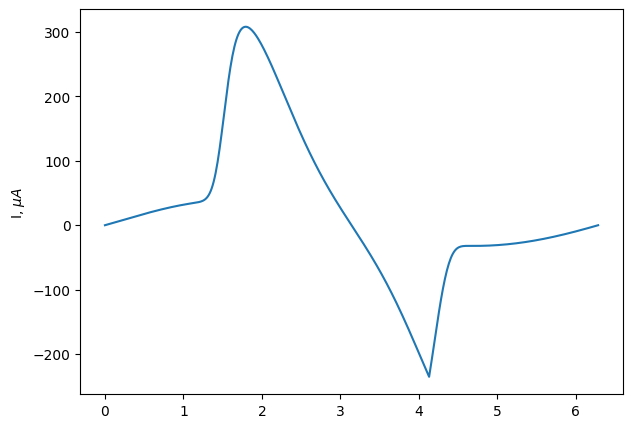

In [357]:
t = np.linspace(0, 2 * np.pi, 500)
V = voltage(t, amplitude= 1.2, n_periods=1)
I = current_calc(t,V)


fig, ax = plt.subplots(figsize = [7, 5])
ax.plot(t, (I)* 1000000)
ax.set_ylabel(r'I, $\mu A$')
#ax.set_xlabel(r'V, $V$')